<a href="https://colab.research.google.com/github/Eric428-a/DataAnalysisProject/blob/main/beauty_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPLANATORY DATA ANALYSIS

In [22]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Load the Data
df = pd.read_csv('/content/beauty.csv')

In [24]:
# Inspect the Data
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      1260 non-null   float64
 1   exper     1260 non-null   int64  
 2   union     1260 non-null   int64  
 3   goodhlth  1260 non-null   int64  
 4   black     1260 non-null   int64  
 5   female    1260 non-null   int64  
 6   married   1260 non-null   int64  
 7   service   1260 non-null   int64  
 8   educ      1260 non-null   int64  
 9   looks     1260 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 98.6 KB


In [26]:
df.describe()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


In [27]:
# Check for Missing Values
df.isnull().sum()

wage        0
exper       0
union       0
goodhlth    0
black       0
female      0
married     0
service     0
educ        0
looks       0
dtype: int64

In [28]:
# Handle Missing Values
df.fillna(df.mean(), inplace=True)  # Fill missing values with column means

In [29]:
# Check for Duplicate Values
duplicate_entries = df.duplicated().sum()  # Count duplicate rows

In [30]:
print(duplicate_entries)

3


In [31]:
# Remove Duplicate Values
df.drop_duplicates(inplace=True)  # Remove duplicate rows

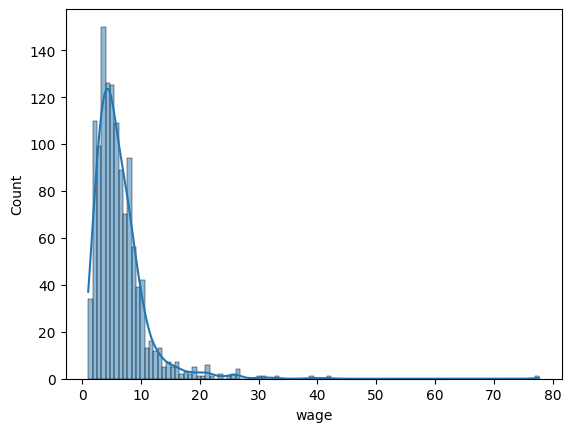

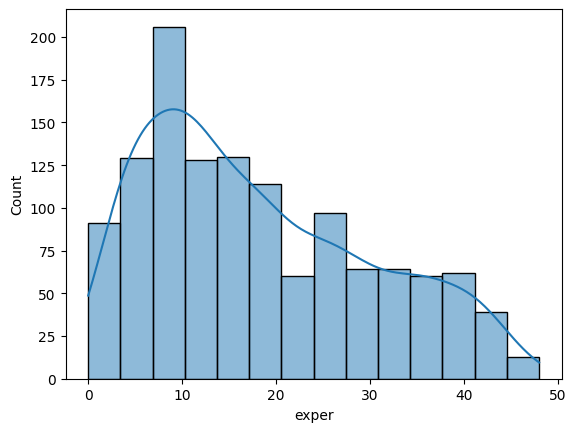

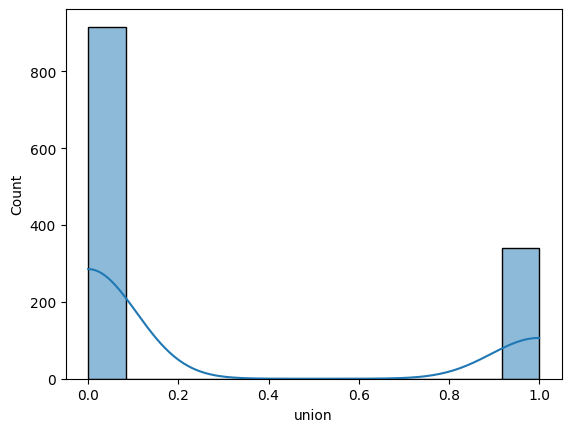

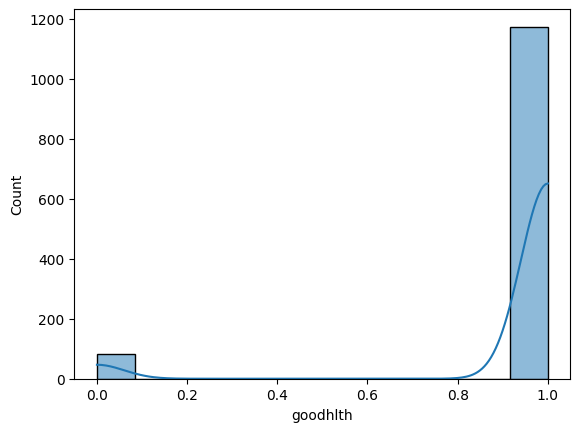

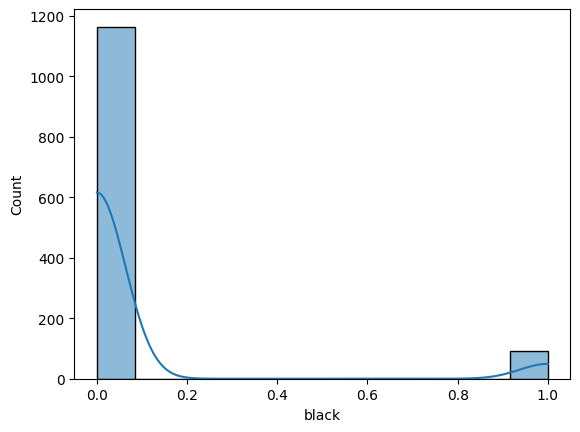

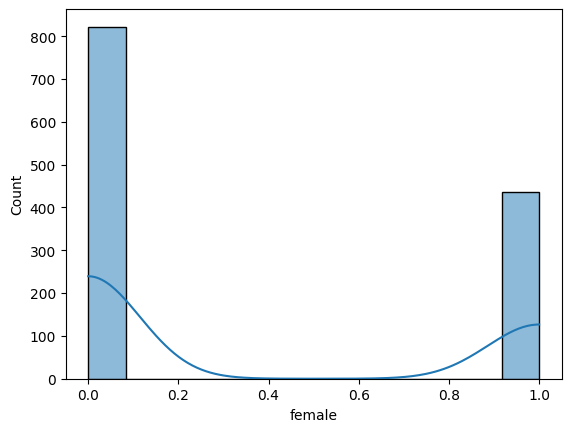

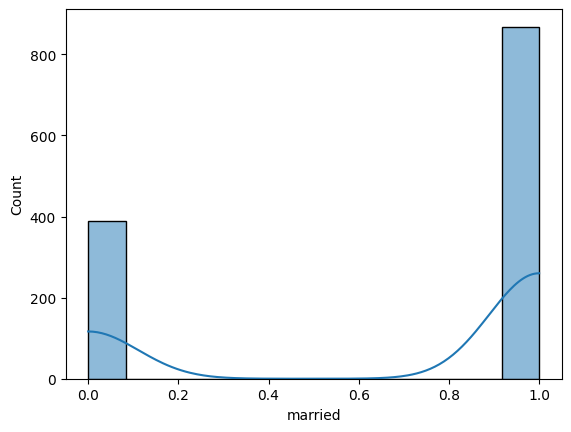

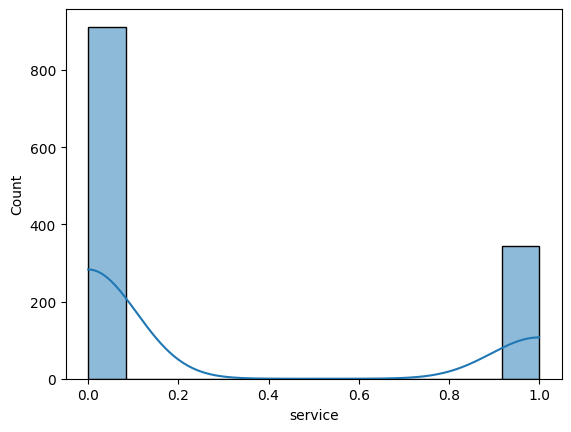

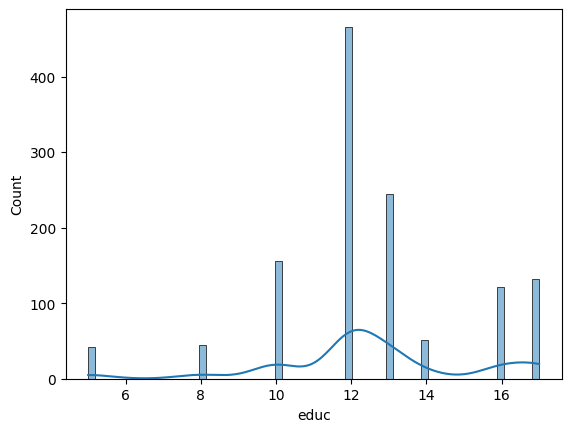

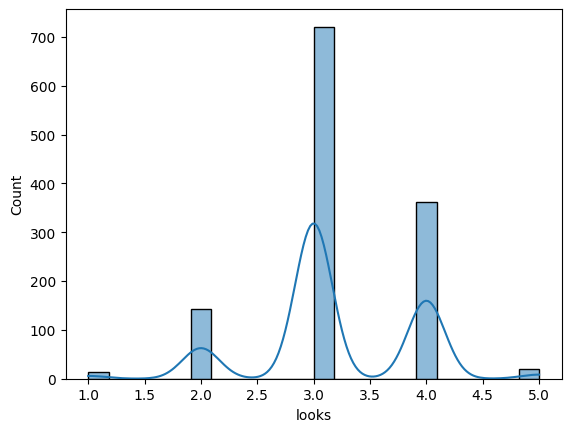

In [32]:
# Visualize the Data
for column in df.columns:
    sns.histplot(df[column], kde=True)
    plt.show()

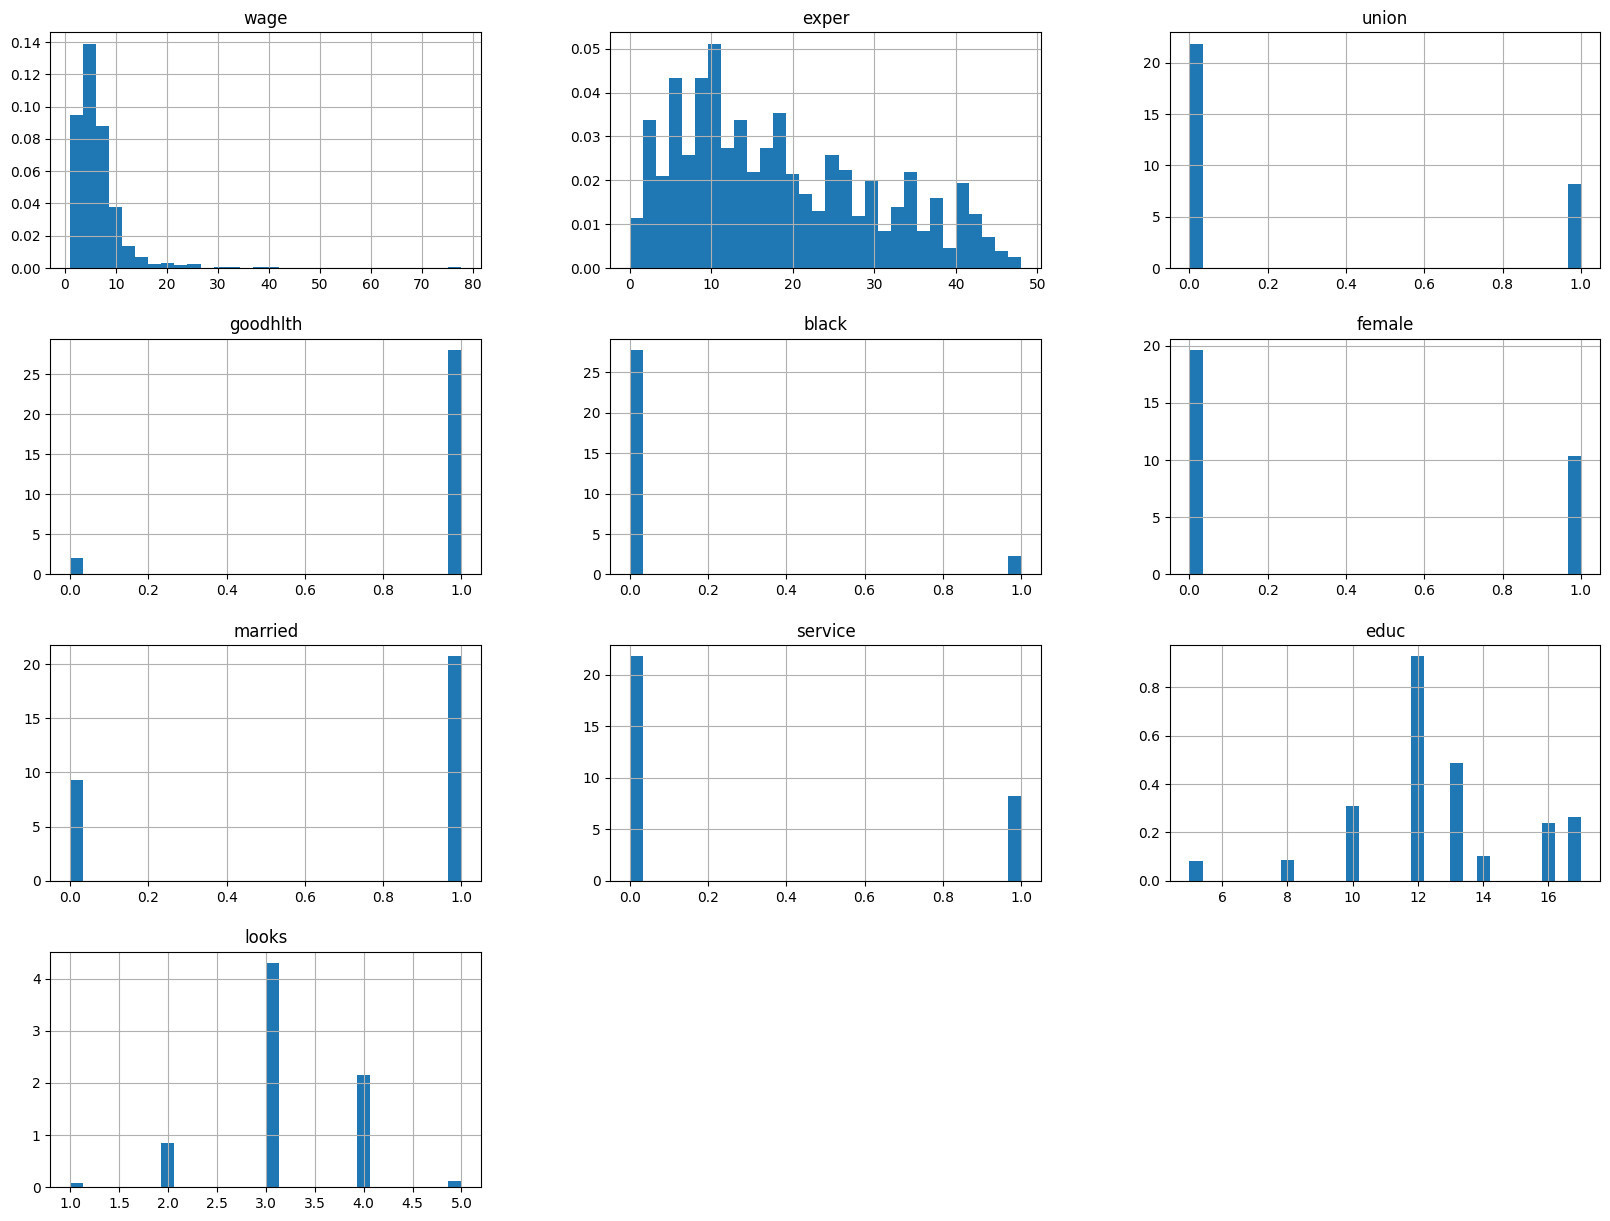

In [33]:
# Check Data Distribution
df.hist(bins=30, figsize=(20,15), density=True)
plt.show()

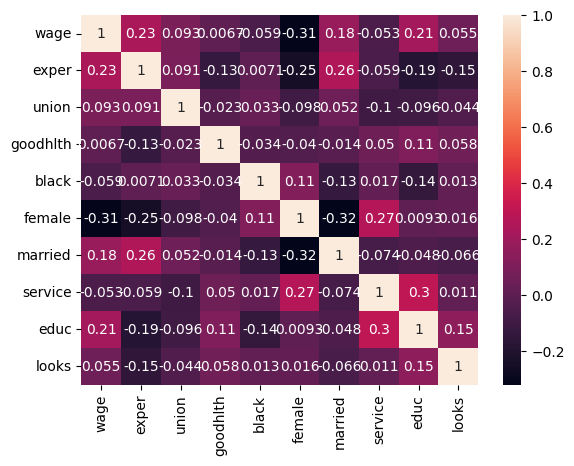

In [34]:
# Check Correlations
sns.heatmap(df.corr(), annot=True)
plt.show()

In [35]:
# Handle Categorical Variables
df = pd.get_dummies(df, drop_first=True)  # Convert categorical variables into dummy/indicator variables

In [36]:
# Outlier Detection
# lets skip

In [37]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [39]:
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)  # Standardize features by removing the mean and scaling to unit variance

In [41]:
# Save the Processed Data
df.to_csv('processed_data.csv', index=False)

# POSSIBLE TASKS FROM THE DATASET

# PREDICTIVE MODELING (LINEAR REGRESSION TO PREDICT WAGES)

In [42]:
# Import Necessary Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [43]:
# Load the Data
df = pd.read_csv('processed_data.csv')

In [44]:
# Prepare the Data
X = df.drop(columns=['wage'])  # Features

In [45]:
y = df['wage']  # Target variable

In [46]:
# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Train the Model
model = LinearRegression()

In [48]:
model.fit(X_train, y_train)

LinearRegression()

In [49]:
# Make Predictions
y_pred = model.predict(X_test)

In [51]:
# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)

In [53]:
print("Mean Squared Error:", mse)

Mean Squared Error: 1.4749727922570892


# DESCRIPTIVE ANALYSIS

In [54]:
# Load the Data
df = pd.read_csv('processed_data.csv')

In [55]:
# Display Summary Statistics
print(df.describe())

               wage         exper         union      goodhlth         black  \
count  1.257000e+03  1.257000e+03  1.257000e+03  1.257000e+03  1.257000e+03   
mean   1.582752e-16 -1.257723e-16 -2.261075e-17  2.063231e-16  7.913762e-17   
std    1.000398e+00  1.000398e+00  1.000398e+00  1.000398e+00  1.000398e+00   
min   -1.133464e+00 -1.523590e+00 -6.101399e-01 -3.736882e+00 -2.826604e-01   
25%   -5.586881e-01 -8.549204e-01 -6.101399e-01  2.676028e-01 -2.826604e-01   
50%   -2.176830e-01 -2.698349e-01 -6.101399e-01  2.676028e-01 -2.826604e-01   
75%    2.970415e-01  7.331689e-01  1.638968e+00  2.676028e-01 -2.826604e-01   
max    1.531628e+01  2.488425e+00  1.638968e+00  2.676028e-01  3.537814e+00   

             female       married       service          educ         looks  
count  1.257000e+03  1.257000e+03  1.257000e+03  1.257000e+03  1.257000e+03  
mean  -6.783224e-17 -1.130537e-16 -2.261075e-17  2.713290e-16  2.487182e-16  
std    1.000398e+00  1.000398e+00  1.000398e+00  1.000

# DATA VISUALIZATION(HISTOGRAM OF WAGES)

In [56]:
# Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
# Load the Data
df = pd.read_csv('processed_data.csv')

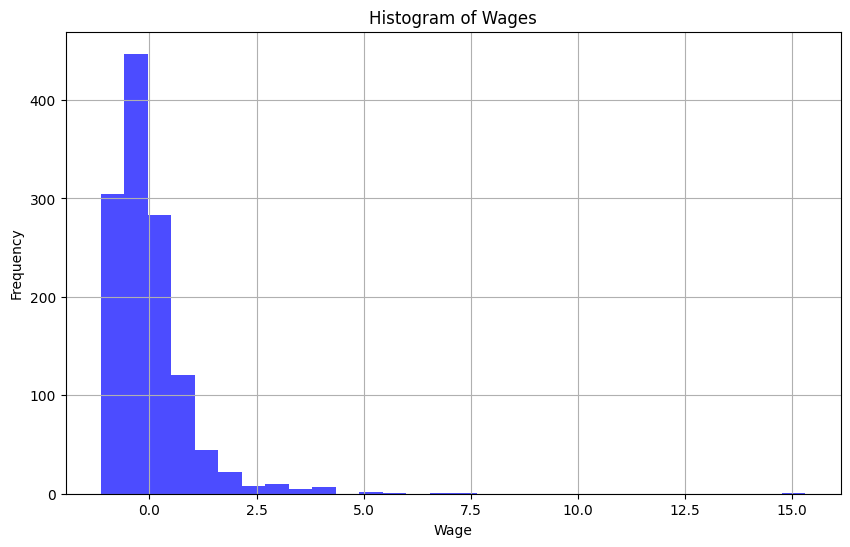

In [58]:
# Plot Histogram of Wages
plt.figure(figsize=(10, 6))
plt.hist(df['wage'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Wages')
plt.xlabel('Wage')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# PREDICTING UNION MEMBERSHIP: A LOGISTIC REGRESSION APPROACH

In [59]:
# Import Necessary Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [60]:
# Load the Data
df = pd.read_csv('processed_data.csv')

In [66]:
# Assuming 'union' column contains continuous values and we want to binarize it based on a threshold
threshold = 0.5  # Define the threshold for binarization
df['union'] = (df['union'] > threshold).astype(int)  # Binarize 'union' column based on the threshold

In [67]:
# Prepare the Data
X = df.drop(columns=['union'])  # Features

In [68]:
y = df['union']  # Target variable

In [69]:
# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Train the Model
model = LogisticRegression()

In [71]:
model.fit(X_train, y_train)

LogisticRegression()

In [72]:
# Make Predictions
y_pred = model.predict(X_test)

In [73]:
# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)

In [74]:
print("Accuracy:", accuracy)

Accuracy: 0.7142857142857143


In [75]:
# Classification Report
print("Classification Report:")

Classification Report:


In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.99      0.83       181
           1       0.33      0.01      0.03        71

    accuracy                           0.71       252
   macro avg       0.53      0.50      0.43       252
weighted avg       0.61      0.71      0.61       252



In [77]:

# Confusion Matrix
print("Confusion Matrix:")

Confusion Matrix:


In [78]:
print(confusion_matrix(y_test, y_pred))

[[179   2]
 [ 70   1]]
